Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [9]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib
import seaborn
seaborn.set()
%matplotlib inline

i = misc.ascent()

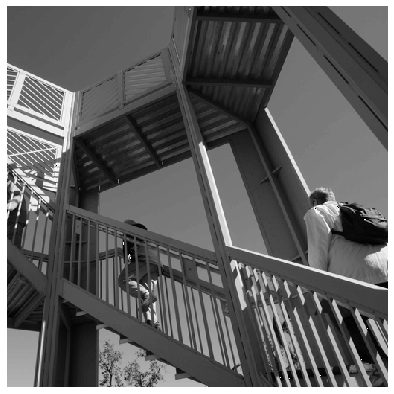

In [11]:
plt.figure(figsize=(7,7))
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [15]:
i_transformed.shape

(512, 512)

In [16]:
i_transformed = np.copy(i)
size_x, size_y = i_transformed.shape

In [17]:
filter = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1

In [18]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
            convolution=0
        if(convolution>255):
            convolution=255
        i_transformed[x, y] = convolution

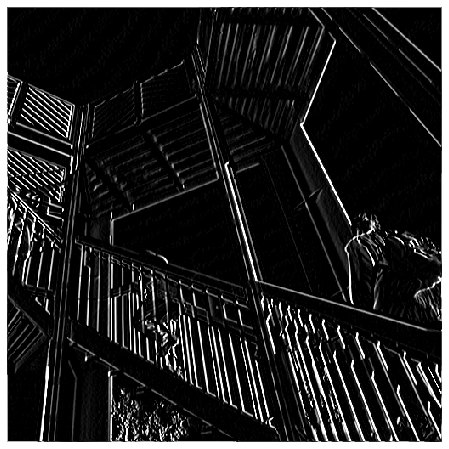

In [20]:
plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()   

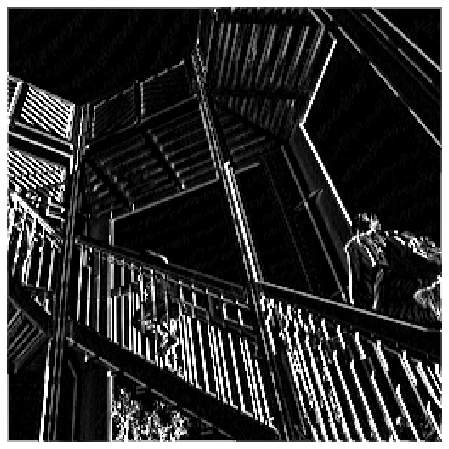

In [21]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2),int(y/2)] = max(pixels)

plt.figure(figsize=(8,8))
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.axis('off')
plt.show()   